In [3]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data 
#from tensorflow.contrib.rnn import LSTMCell tf.logging.set_verbosity(tf.logging.ERROR) 
from time import time 
from matplotlib.colors import hsv_to_rgb
from scipy.stats import ks_2samp

## Reading data

In [4]:
apple = data.DataReader('AFI.AX', 'yahoo', start='1/1/2010', end= '1/10/2015')
apple['Returns'] = apple['Adj Close'].pct_change()
mu = apple['Returns'].mean()
std = apple['Returns'].std()

In [6]:
mu, std

(0.0038995028124773315, 0.08867293733836576)

In [19]:
def sample_data(mu, std, n_samples=50000, seq_length=10):

    vectors = []

    for i in range(n_samples):
        daily_returns=np.random.normal(mu, std, seq_length)
        vectors.append(daily_returns)
    
    return np.asarray(vectors)

In [8]:
def series_from_returns(start, returns):
    res = [start]
    for ret in returns:
        res.append(res[-1]*ret + res[-1])
    return res

In [9]:
samples = sample_data()

In [11]:
samples.mean(), samples.std()

(0.003923231545943708, 0.08866795958747975)

/Users/ekaterinapogodina/venv3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ekaterinapogodina/venv3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  3.,  12.,  19.,  11.,  14.,   5.,  11.,   6.,   8.,   8.,   8.,
          3.,  10., 110., 799., 122.,   9.,   2.,   6.,   9.,   7.,   4.,
          8.,  11.,  13.,  10.,  19.,  13.,   2.,   3.]),
 array([-0.30974917, -0.28842928, -0.26710938, -0.24578949, -0.2244696 ,
        -0.2031497 , -0.18182981, -0.16050992, -0.13919002, -0.11787013,
        -0.09655023, -0.07523034, -0.05391045, -0.03259055, -0.01127066,
         0.01004923,  0.03136913,  0.05268902,  0.07400891,  0.09532881,
         0.1166487 ,  0.13796859,  0.15928849,  0.18060838,  0.20192828,
         0.22324817,  0.24456806,  0.26588796,  0.28720785,  0.30852774,
         0.32984764]),
 <a list of 30 Patch objects>)

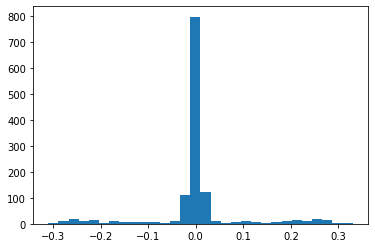

In [12]:
plt.hist(np.log(apple['Returns'] + 1), bins=30)

In [14]:
# seq_length = 10

# samples = sample_data(seq_length=seq_length)

# learning_rate = 0.001 
# lr = learning_rate 
# batch_size = 28 
# num_epochs = 50 
# vis_freq = 2

# labels = None 
# D_rounds = 3 
# G_rounds = 1 

## Simple 2-Layer architecture

In [59]:
%load_ext autoreload
%autoreload
from gans.gan import GAN
# from gans.wgan import WGAN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
gan = GAN()

In [61]:
gen_samples = gan.train_loop(samples)

epoch: 0 	D_loss: 1.3643582 	G_loss: 0.7025103 	Total_loss: 2.0668685
epoch: 0 	D_loss: 1.2982807 	G_loss: 0.8172432 	Total_loss: 2.1155238
epoch: 1 	D_loss: 1.4054861 	G_loss: 0.6905142 	Total_loss: 2.0960002
epoch: 1 	D_loss: 1.4038427 	G_loss: 0.6785771 	Total_loss: 2.0824199
epoch: 2 	D_loss: 1.3994896 	G_loss: 0.68185663 	Total_loss: 2.0813463
epoch: 2 	D_loss: 1.3935328 	G_loss: 0.6857015 	Total_loss: 2.0792341
epoch: 3 	D_loss: 1.3945107 	G_loss: 0.6858668 	Total_loss: 2.0803776
epoch: 3 	D_loss: 1.3883022 	G_loss: 0.6933112 	Total_loss: 2.0816135
epoch: 4 	D_loss: 1.3932507 	G_loss: 0.6922644 	Total_loss: 2.085515
epoch: 4 	D_loss: 1.3960507 	G_loss: 0.688367 	Total_loss: 2.0844178


In [62]:
np.mean(gan.g_loss[-1000:]), np.mean(gan.d_loss[-1000:])

(0.68935317, 1.3939782)

Text(0, 0.5, 'loss')

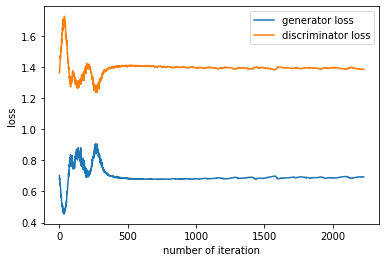

In [63]:
plt.plot(gan.g_loss[:4000])
plt.plot(gan.d_loss[:4000])
plt.legend(['generator loss', 'discriminator loss'])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [21]:
gen_samples2.mean(), gen_samples2.std()

(-0.06688655, 0.06123255)

## Sequence of length 10

### Monte Carlo simulations:

In [22]:
start = apple['Adj Close'][0]

/Users/ekaterinapogodina/venv3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


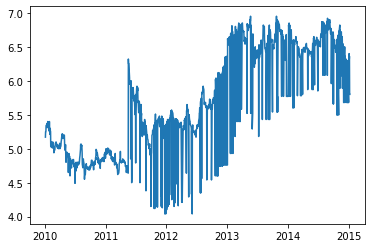

In [23]:
plt.plot(apple['Adj Close'])

### GAN results

Text(0.5, 0, 'sequence length')

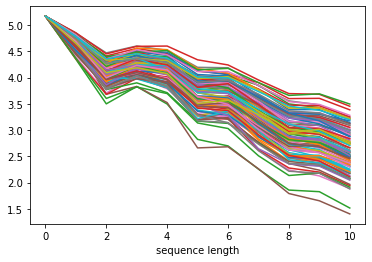

In [26]:
for sample in gen_samples2.reshape(49980, 10)[-100:]:
    plt.plot(series_from_returns(start, sample))
    
plt.xlabel('sequence length')

Text(0.5, 0, 'sequence length')

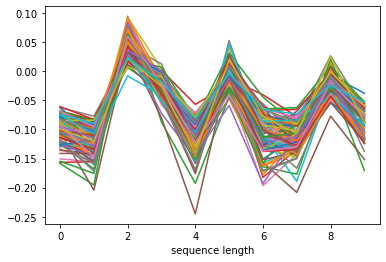

In [27]:
for sample in np.vstack(gen_samples2)[-100:]:
    plt.plot( sample)
    
plt.xlabel('sequence length')

In [ ]:
import numpy as np

In [28]:
samples.mean(), samples.std()

(0.003997954365787607, 0.0887983992331364)

In [29]:
gen_samples2.mean(), gen_samples2.std()

(-0.06688655, 0.06123255)

### Testing if the generated data is normal distribution

In [30]:
from scipy import stats

In [32]:
all_gen_samples = np.vstack(gen_samples2)
p_value = np.mean([stats.normaltest(all_gen_samples[i]) for i in range(1000)])

/Users/ekaterinapogodina/venv3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [33]:
p_value = np.mean([stats.normaltest(all_gen_samples[i]).pvalue for i in range(1000)])

In [34]:
print("Mean p_value", p_value)

Mean p_value 0.41868592612268035


## DCGAN

In [1]:
from gans.dcgan import DCGAN

In [10]:
gan2 = DCGAN(num_epochs=10) 
gen_samples = gan2.train_loop(samples, reshape=True)

epoch: 0 	D_loss: 1.3853507 	G_loss: 0.6962473 	Total_loss: 2.081598
epoch: 0 	D_loss: 1.3852084 	G_loss: 0.69854337 	Total_loss: 2.0837517
epoch: 1 	D_loss: 1.3852273 	G_loss: 0.6965008 	Total_loss: 2.081728
epoch: 1 	D_loss: 1.382612 	G_loss: 0.700553 	Total_loss: 2.083165
epoch: 2 	D_loss: 1.3848019 	G_loss: 0.6971779 	Total_loss: 2.0819798
epoch: 2 	D_loss: 1.3885309 	G_loss: 0.69184494 	Total_loss: 2.0803757
epoch: 3 	D_loss: 1.3871734 	G_loss: 0.6962028 	Total_loss: 2.0833762
epoch: 3 	D_loss: 1.3856251 	G_loss: 0.69419765 	Total_loss: 2.0798228
epoch: 4 	D_loss: 1.3845396 	G_loss: 0.6954474 	Total_loss: 2.079987
epoch: 4 	D_loss: 1.3842703 	G_loss: 0.6940638 	Total_loss: 2.078334
epoch: 5 	D_loss: 1.3869743 	G_loss: 0.6928919 	Total_loss: 2.0798662
epoch: 5 	D_loss: 1.3847775 	G_loss: 0.6950236 	Total_loss: 2.079801
epoch: 6 	D_loss: 1.3845521 	G_loss: 0.69542557 	Total_loss: 2.0799778
epoch: 6 	D_loss: 1.387214 	G_loss: 0.6934544 	Total_loss: 2.0806684
epoch: 7 	D_loss: 1.38869

### Learning curves:

Text(0, 0.5, 'loss')

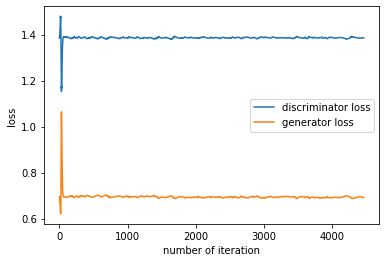

In [29]:
plt.plot(gan2.d_loss)
plt.plot(gan2.g_loss)
plt.legend(['discriminator loss', 'generator loss',])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [13]:
np.mean(gan2.g_loss[-1000:]), np.mean(gan2.d_loss[-1000:])

(0.6924359, 1.3864267)

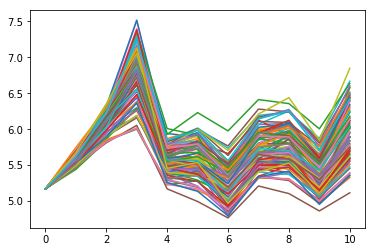

In [44]:
for sample in gen_samples.reshape(49980, 10)[:100]:
    plt.plot(series_from_returns(start, sample.reshape(-1)))

In [48]:
p_value = np.mean([stats.normaltest(gen_samples.reshape(49980, 10)[i]).pvalue for i in range(batch_size)])

/Users/ekaterinapogodina/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [49]:
p_value

0.43248994287366277

## DCGAN for Sequence of length 50

In [255]:
seq_length = 50
samples = sample_data(seq_length=seq_length)

In [262]:
d_loss = [] 
g_loss = [] 

for num_epoch in range(num_epochs):

    for batch_idx in range(int(len(samples)/batch_size)):

        if num_epoch % 2 == 0:

            D_loss_curr = train_discriminator(batch_idx , 0, samples)
            G_loss_curr = train_generator() 

        else:

            D_loss_curr = train_discriminator(batch_idx , 0, samples) 
            G_loss_curr = train_generator()

        d_loss.append(D_loss_curr) 
        g_loss.append(G_loss_curr) 
        t = time() -t0
        
        if num_epoch % 5 == 0: 
            
            print(num_epoch ,'\t', D_loss_curr , '\t', G_loss_curr , '\t', t)

            gen_samples = [] 
            for batch_idx in range(int(len(samples) / batch_size)):

                X_mb = get_batch(samples , batch_size , batch_idx) 
                Y_mb = get_batch(samples , batch_size , batch_idx) 
                z_ = sample_Z(batch_size , seq_length , latent_dim) 
                gen_samples_mb = sess.run(G_sample , feed_dict = {Z: z_}) 
                gen_samples.append(gen_samples_mb) 
#                 print (batch_idx)

        gen_samples = np.vstack(gen_samples)

0 	 1.3848195 	 0.69301546 	 6.219717264175415
0 	 1.4162279 	 0.66242975 	 11.812706232070923
0 	 1.4534283 	 0.62948483 	 17.818626165390015
0 	 1.5084918 	 0.57975674 	 23.372950077056885
0 	 1.5872234 	 0.53508556 	 28.756214141845703
0 	 1.6753069 	 0.47725746 	 34.561315059661865
0 	 1.7518642 	 0.4344179 	 39.994632959365845
0 	 1.8080192 	 0.42372036 	 45.44841718673706
0 	 1.7807364 	 0.44560304 	 50.92529010772705
0 	 1.6475484 	 0.5524634 	 56.33725595474243
0 	 1.4156735 	 0.77068484 	 62.257766246795654
0 	 1.1766115 	 1.1007168 	 68.85953521728516
0 	 1.0329924 	 1.4040309 	 74.95142316818237
0 	 0.9518771 	 1.570075 	 82.47478103637695
0 	 0.92214394 	 1.7157754 	 88.87621402740479
0 	 0.9360207 	 1.703686 	 94.21891832351685
0 	 0.93500364 	 1.6169217 	 99.66804313659668
0 	 0.9640014 	 1.5547875 	 105.02581524848938
0 	 0.98042643 	 1.4666213 	 111.59234118461609
0 	 1.0412178 	 1.3290408 	 118.3931610584259
0 	 1.0790689 	 1.2085086 	 123.71912622451782
0 	 1.1144496 

0 	 1.3879147 	 0.694354 	 1034.4355280399323
0 	 1.3878095 	 0.6943912 	 1040.4464440345764
0 	 1.3877606 	 0.69441223 	 1046.6714639663696
0 	 1.387763 	 0.69442856 	 1053.4675981998444
0 	 1.3877144 	 0.6944415 	 1061.0816142559052
0 	 1.3876175 	 0.6944636 	 1068.3038249015808
0 	 1.387734 	 0.69447327 	 1074.0365171432495
0 	 1.3877505 	 0.69448626 	 1080.9297013282776
0 	 1.3876812 	 0.6944953 	 1089.5301010608673
0 	 1.3876472 	 0.69449776 	 1095.9190752506256
0 	 1.3875494 	 0.69450283 	 1101.8903832435608
0 	 1.3876126 	 0.69452095 	 1111.8653452396393
0 	 1.3875555 	 0.69455004 	 1121.9882612228394
0 	 1.3874148 	 0.69459116 	 1130.3805961608887
0 	 1.3873492 	 0.69462824 	 1137.373514175415
0 	 1.3874102 	 0.69466716 	 1143.9562141895294
0 	 1.3872072 	 0.6946958 	 1150.487123966217
0 	 1.3872156 	 0.6947222 	 1159.8726632595062
0 	 1.3871715 	 0.6947497 	 1166.4752171039581
0 	 1.3872099 	 0.69477797 	 1172.5223860740662
0 	 1.3871236 	 0.6948061 	 1178.996829032898
0 	 1.3

0 	 1.3834655 	 0.70281494 	 2148.051623106003
0 	 1.383522 	 0.70283693 	 2154.0430562496185
0 	 1.383379 	 0.7028651 	 2160.5286750793457
0 	 1.3833404 	 0.70288974 	 2165.947329044342
0 	 1.3832197 	 0.70291084 	 2171.476538181305
0 	 1.383282 	 0.7029204 	 2177.0414900779724
0 	 1.3831394 	 0.70292777 	 2183.294520139694
0 	 1.3831029 	 0.7029863 	 2189.108111143112
0 	 1.3830197 	 0.7030326 	 2195.301703929901
0 	 1.383091 	 0.70308 	 2202.1866660118103
0 	 1.3832774 	 0.7031291 	 2209.0698733329773
0 	 1.3831403 	 0.7031843 	 2216.231835126877
0 	 1.3830986 	 0.70320547 	 2224.4788331985474
0 	 1.3831699 	 0.7031902 	 2231.139019012451
0 	 1.3831129 	 0.7031783 	 2237.2741491794586
0 	 1.3831105 	 0.70318043 	 2243.252056121826
0 	 1.3831973 	 0.7031831 	 2249.1245760917664
0 	 1.3832259 	 0.7031694 	 2255.137110233307
0 	 1.3833097 	 0.7031541 	 2260.9648110866547
0 	 1.3832098 	 0.70312387 	 2266.3448882102966
0 	 1.3835366 	 0.7030787 	 2271.896192073822
0 	 1.3835806 	 0.7030

0 	 1.3871003 	 0.6964734 	 3236.7968740463257
0 	 1.387023 	 0.6965434 	 3242.490803003311
0 	 1.3868073 	 0.6967559 	 3249.074158191681
0 	 1.3866081 	 0.6969153 	 3255.083904027939
0 	 1.3863683 	 0.69705254 	 3263.2653980255127
0 	 1.3862433 	 0.6971895 	 3268.8993589878082
0 	 1.3861443 	 0.6972636 	 3275.436215162277
0 	 1.3860278 	 0.6973351 	 3282.168018102646
0 	 1.3860388 	 0.6973656 	 3290.4373252391815
0 	 1.3860378 	 0.697341 	 3299.3468160629272
0 	 1.3861256 	 0.6973133 	 3308.6524090766907
0 	 1.3861244 	 0.6972904 	 3315.0492391586304
0 	 1.3862786 	 0.69726753 	 3322.2617580890656
0 	 1.3863672 	 0.69723195 	 3327.71355009079
0 	 1.386368 	 0.69724137 	 3333.4454600811005
0 	 1.386514 	 0.6972233 	 3339.8018832206726
0 	 1.386436 	 0.69722813 	 3347.3189990520477
0 	 1.3866454 	 0.6971033 	 3353.1927502155304
0 	 1.3867962 	 0.69701385 	 3359.524819135666
0 	 1.3869448 	 0.69689983 	 3368.634217977524
0 	 1.3871727 	 0.69678813 	 3379.85311794281
0 	 1.3871353 	 0.696

0 	 1.3897887 	 0.69314766 	 4432.427544116974
0 	 1.3899585 	 0.6931214 	 4439.991480112076
0 	 1.3900037 	 0.6930385 	 4446.631406068802
0 	 1.3899783 	 0.6930126 	 4452.735991239548
0 	 1.3898644 	 0.69302386 	 4458.558575153351
0 	 1.3898399 	 0.69301504 	 4464.56924700737
0 	 1.3898392 	 0.69310325 	 4470.892707109451
0 	 1.3898687 	 0.6929993 	 4478.941061258316
0 	 1.3898792 	 0.6929708 	 4485.62242102623
0 	 1.3897513 	 0.6930331 	 4492.430526971817
0 	 1.3897083 	 0.6931104 	 4498.130345106125
0 	 1.3896937 	 0.6931454 	 4504.516474246979
0 	 1.3897388 	 0.6931604 	 4510.88245511055
0 	 1.3898567 	 0.69319314 	 4516.669157266617
0 	 1.3896682 	 0.69329786 	 4524.512243032455
0 	 1.3894609 	 0.6933715 	 4530.602363348007
0 	 1.3895576 	 0.6934888 	 4536.633039236069
0 	 1.3894606 	 0.6935073 	 4542.583122014999
0 	 1.3895735 	 0.69358194 	 4548.753841161728
0 	 1.3894571 	 0.69364434 	 4554.667097091675
0 	 1.3893368 	 0.69380325 	 4561.31587100029
0 	 1.3891104 	 0.69394505 	 

KeyboardInterrupt: 

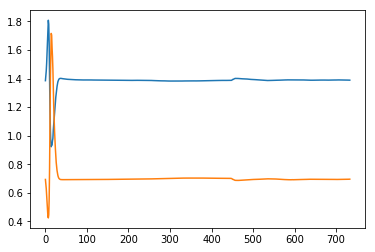

In [272]:
plt.plot(d_loss)
plt.plot(g_loss)

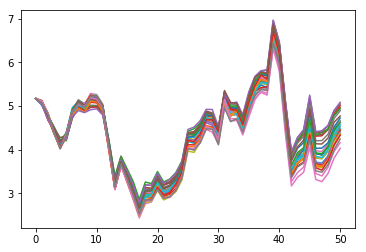

In [271]:
for sample in gen_samples[-4]:
    plt.plot(series_from_returns(start, sample.reshape(-1)))

In [273]:
p_value = np.mean([stats.normaltest(gen_samples[-4]).pvalue for i in range(1000)])

In [274]:
p_value

0.5291055713952271

# Real mean value and std

In [14]:
mu = apple['Adj Close'].mean()
std = apple['Adj Close'].std()

In [15]:
mu, std

(5.680612396854925, 0.7699040681456591)

In [20]:
samples10 = sample_data(mu, std)

## Vanilla GAN, seq length = 10

In [25]:
from gans.gan import GAN
gan = GAN(num_epochs=10)

In [28]:
gen_samples10 = gan.train_loop(samples10)

epoch: 0 	D_loss: 1.3215537 	G_loss: 0.75996464 	Total_loss: 2.0815184
epoch: 0 	D_loss: 1.2032902 	G_loss: 0.982152 	Total_loss: 2.1854422
epoch: 1 	D_loss: 0.974587 	G_loss: 1.173371 	Total_loss: 2.147958
epoch: 1 	D_loss: 1.0019035 	G_loss: 1.0828183 	Total_loss: 2.0847218
epoch: 2 	D_loss: 1.5736815 	G_loss: 0.70101696 	Total_loss: 2.2746985
epoch: 2 	D_loss: 1.1982594 	G_loss: 0.8078822 	Total_loss: 2.0061417
epoch: 3 	D_loss: 1.1545646 	G_loss: 0.8261607 	Total_loss: 1.9807253
epoch: 3 	D_loss: 1.1584499 	G_loss: 0.8136406 	Total_loss: 1.9720905
epoch: 4 	D_loss: 1.3751051 	G_loss: 0.69550914 	Total_loss: 2.0706143
epoch: 4 	D_loss: 1.30137 	G_loss: 0.790631 	Total_loss: 2.092001
epoch: 5 	D_loss: 1.291165 	G_loss: 0.7571557 	Total_loss: 2.0483208
epoch: 5 	D_loss: 1.5849233 	G_loss: 0.67785496 	Total_loss: 2.2627783
epoch: 6 	D_loss: 1.5029864 	G_loss: 0.6872901 	Total_loss: 2.1902766
epoch: 6 	D_loss: 1.3256222 	G_loss: 0.7698301 	Total_loss: 2.0954523
epoch: 7 	D_loss: 1.23986

Text(0, 0.5, 'loss')

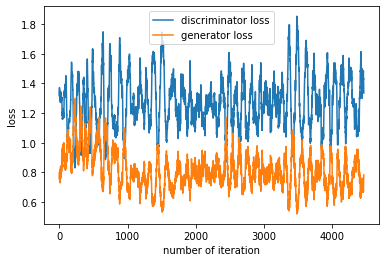

In [30]:
plt.plot(gan.d_loss)
plt.plot(gan.g_loss)
plt.legend(['discriminator loss', 'generator loss',])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [33]:
from scipy import stats

## Normal test

In [34]:
p_value = np.mean([stats.normaltest(gen_samples10.reshape(49980, 10)[i]).pvalue for i in range(49980)])

/Users/ekaterinapogodina/venv3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [39]:
p_value

0.8800444561602851

In [37]:
np.mean(samples10), np.std(samples10)

(5.680139078217417, 0.7702641993519734)

In [35]:
np.mean(gen_samples10), np.std(gen_samples10)

(5.685018, 1.5404629)

# DCGAN, seq length = 10

In [40]:
gan = DCGAN(num_epochs=10) 
gen_samples10 = gan.train_loop(samples10, reshape=True)

epoch: 0 	D_loss: 1.0729164 	G_loss: 0.6964683 	Total_loss: 1.7693846
epoch: 0 	D_loss: 1.2486621 	G_loss: 0.97266185 	Total_loss: 2.221324
epoch: 1 	D_loss: 1.4647182 	G_loss: 0.7160551 	Total_loss: 2.1807733
epoch: 1 	D_loss: 1.1218078 	G_loss: 0.77227885 	Total_loss: 1.8940866
epoch: 2 	D_loss: 1.4619364 	G_loss: 0.8413334 	Total_loss: 2.3032699
epoch: 2 	D_loss: 1.3339493 	G_loss: 0.75285774 	Total_loss: 2.086807
epoch: 3 	D_loss: 1.3126272 	G_loss: 0.7820488 	Total_loss: 2.094676
epoch: 3 	D_loss: 1.378041 	G_loss: 0.6856664 	Total_loss: 2.0637074
epoch: 4 	D_loss: 1.1990299 	G_loss: 0.8127718 	Total_loss: 2.0118017
epoch: 4 	D_loss: 1.3791296 	G_loss: 0.6908189 	Total_loss: 2.0699487
epoch: 5 	D_loss: 1.3123851 	G_loss: 0.72902995 	Total_loss: 2.041415
epoch: 5 	D_loss: 1.3121223 	G_loss: 0.7110742 	Total_loss: 2.0231965
epoch: 6 	D_loss: 1.2248006 	G_loss: 0.7964081 	Total_loss: 2.0212088
epoch: 6 	D_loss: 1.2373238 	G_loss: 0.93535906 	Total_loss: 2.1726828
epoch: 7 	D_loss: 1.

Text(0, 0.5, 'loss')

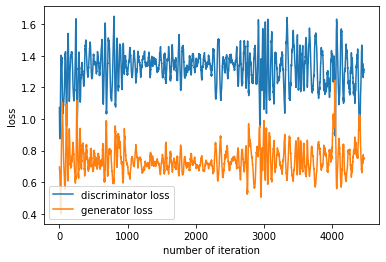

In [41]:
plt.plot(gan.d_loss)
plt.plot(gan.g_loss)
plt.legend(['discriminator loss', 'generator loss',])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [42]:
#normal test
p_value = np.mean([stats.normaltest(gen_samples10.reshape(49980, 10)[i]).pvalue for i in range(49980)])

/Users/ekaterinapogodina/venv3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [43]:
np.mean(gen_samples10), np.std(gen_samples10)

(5.2156243, 0.8090968)